# How Can Family Affect Students Behaviors?
### by Ahmed Alaa Mousa

## Investigation Overview

Children are a very important part of our society, they are our future.
<br>
Analyzing their life conditions like family can make us better understand their problems and better help them.
<br>
In this Investigation, Using the PISA dataset I will analyze Students' work ethics and their opinion on teachers, and whether the family can affect these behaviors and opinions or not.


## Dataset Overview

PISA dataset is a survey of student's skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics, and science representing about 28 million 15-year-olds globally.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('selected_columns_from_pisa.csv')

In [3]:
#PREPRATIONS from exploration notebook
color = sb.color_palette()[0]

f_work_order = ['Working full-time <for pay> ', 'Working part-time <for pay>', 'Not working, but looking for a job', 'Other (e.g. home duties, retired) ']
m_work_order = ['Working full-time <for pay> ', 'Working part-time <for pay>', 'Not working, but looking for a job ', 'Other (e.g. home duties, retired) ']

df['father_wk_st'] = df['father_wk_st'].astype(pd.api.types.CategoricalDtype(ordered = True,categories = f_work_order))
df['mother_wk_st'] = df['mother_wk_st'].astype(pd.api.types.CategoricalDtype(ordered = True,categories = m_work_order))

failure_attitudes = ['teacher_not_explaining_well', 'teacher_didnt_get_students_interested', 'bad_guesses', 'unlucky']
likely_orders = ['Very   Likely', 'Likely', 'Slightly likely', 'Not at all likely']

for feature in failure_attitudes,:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = likely_orders)
    df[feature] = df[feature].astype(ordered_var)
    
def plot_multiple(figsize, plotting_list, nrows=1, ncols=1, labelrotation=0):
    """
    plot multiple plots that share almost the 
    same variable:
    - figsize (list): size of full figure
    - nrows (int): number of rows
    - ncols (int): number of columns
    - plotting_list (list): list of df columns
    - labelrotation (int): rotation of axis labels
    """
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)

    for index, attitude in enumerate(plotting_list): 
        sb.countplot(data = df, x = attitude, color = color, ax = ax[index])
        ax[index].set_xlabel('')
        ax[index].set_ylabel('')
        ax[index].tick_params(labelrotation=labelrotation)
        ax[index].set_title(attitude);
        

belonging_features = ['outsider', 'awkward', 'lonely', 'satisfied_at_school']
agree_orders = ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree' ]

for feature in belonging_features,:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = agree_orders)
    df[feature] = df[feature].astype(ordered_var)

    
agree_scores = [2, 1, -1, -2]
likely_scores = [3, 2, 1, -2]

agree_orders_numeric = {agree_orders[i]: agree_scores[i] for i in range(len(agree_orders))} 
likely_orderss_numeric = {likely_orders[i]: likely_scores[i] for i in range(len(likely_orders))} 

for feature in failure_attitudes:
    df[feature+'_n'] = df[feature].map(likely_orderss_numeric)
    
for feature in belonging_features:
    df[feature+'_n'] = df[feature].map(agree_orders_numeric)

df['socially_bad_feelings'] = df['awkward_n'].astype('float') + df['outsider_n'].astype('float') + df['lonely_n'].astype('float')
df['irresponsible_thinking'] = df['bad_guesses_n'].astype('float') + df['unlucky_n'].astype('float')
df['teachers_fault_thinking'] = df['teacher_not_explaining_well_n'].astype('float') + df['teacher_didnt_get_students_interested_n'].astype('float')
df['satisfied_at_school_n'] = df['satisfied_at_school_n'].astype('float')

df = df.drop(['teacher_not_explaining_well_n',
         'teacher_didnt_get_students_interested_n',
         'bad_guesses_n',
         'unlucky_n',
         'outsider_n', 
         'awkward_n', 
         'lonely_n']
        , axis=1)

conditions = [
    (df['brothers'] == 'Yes') & (df['sisters'] == 'Yes'),
    (df['brothers'] == 'Yes'),
    (df['sisters'] == 'Yes'),
    (df['brothers'] == 'No') & (df['sisters'] == 'No')]
choices = ['both', 'brothers', 'sisters', 'no']
df['siblings'] = np.select(conditions, choices, default=None)

## Does Family Matters? 

Work ethics is a score that summarizes student's answers regarding the effort they do on studying math, like home-work and before exams behaviors, so we can take this as a score of their overall work ethics.

* We see here That having both parents have a positive work ethic value.
* If the mother not at home and there is the father only it creates a negative work ethic score.
* A closer score can be found also with the absence of the father with the mother at home but in this case is better.
<br><br>
* Finally, we found a surprise here, that if there are no parents at all, the work ethics score increases so much passing the two parents' score, we should ask why students behave like that:
    - Why they become more valuable students and (we can predict) better workers in the future?
    - What is thier famliy condition now? (relatives/adoption/grandparents)
    - Are they afraid of a rough life knowing that there is no family to support them?
    - Are there raising families to support them and take good care of them more than usual?

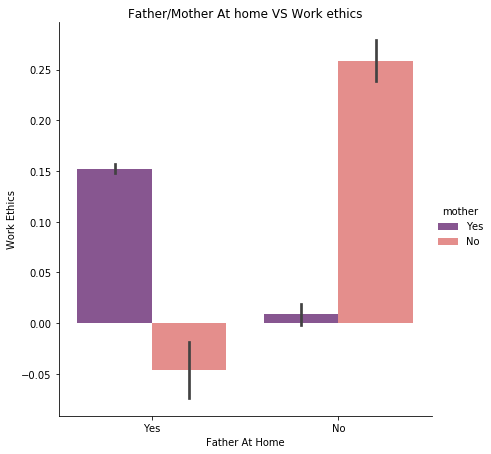

In [4]:
g = sb.catplot(data=df, kind="bar",
           x="father", y="math_wk_ethic", hue="mother",
           palette="magma", alpha=.8, height=6)
plt.title('Father/Mother At home VS Work ethics')
g.set_axis_labels("Father At Home", "Work Ethics");
#g.savefig('Sample.png', bbox_inches='tight')


## Boys Vs Girls 

* Girls overall have more ethics than Boys in all cases.
* Boys with no father have a negative score compare to females.
    * does a boy need his father more than his mother?

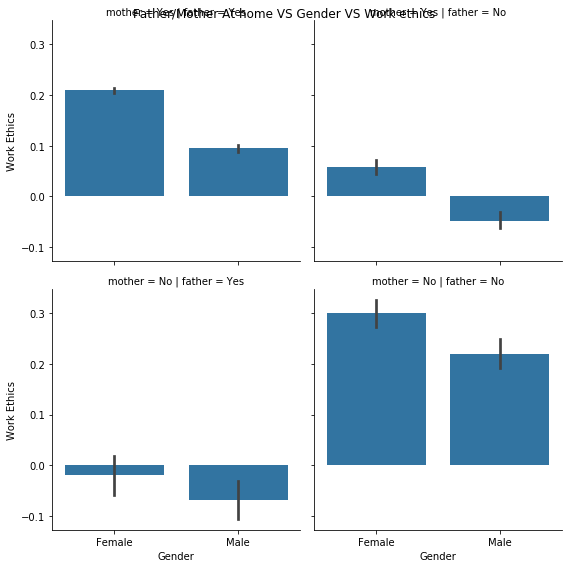

In [5]:
g = sb.catplot(data=df, kind="bar",
           x="gender", y="math_wk_ethic", row="mother", col='father',
           color=color, height=4);
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Father/Mother At home VS Gender VS Work ethics')
g.set_axis_labels("Gender", "Work Ethics")
g.tight_layout()

## Father Gone? what does Mom do?

* A Girl with Here Father there, and A home Mom will have the highest Work Ethics.
* the poor boys, if their father isn't home they will do bad unless their mothers stayed and took care of them.

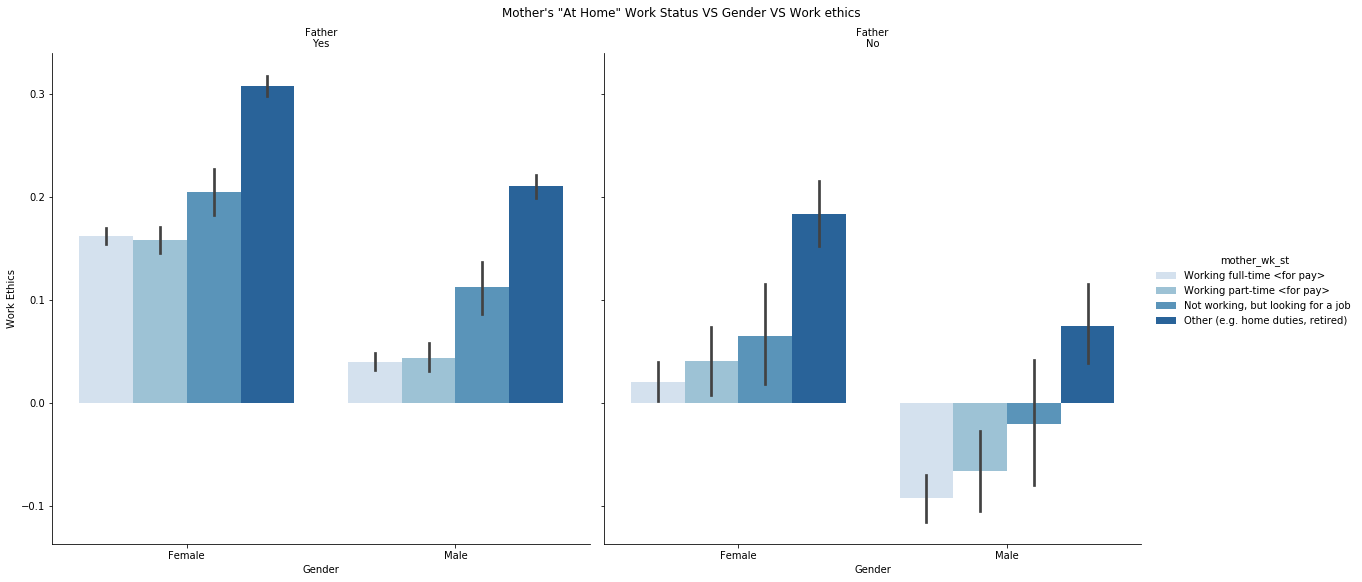

In [6]:
g = sb.catplot(data=df[df['mother'] == 'Yes'], kind="bar",
               x="gender", y="math_wk_ethic", hue="mother_wk_st", col="father",
               palette="Blues", alpha=1, height=8)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Mother\'s "At Home" Work Status VS Gender VS Work ethics')
g.set_axis_labels("Gender", "Work Ethics")
g.set_titles("Father\n{col_name}");

## What do fathers do? Mom not at home effect... 

* with Mothers there for their children its all fine, and their father work status doesn't affect them as much
    - still girls better than boys
    
* but the poor kids without their mothers can't handle it at all, scores drop to zero and the father home or not aren't effective at all.

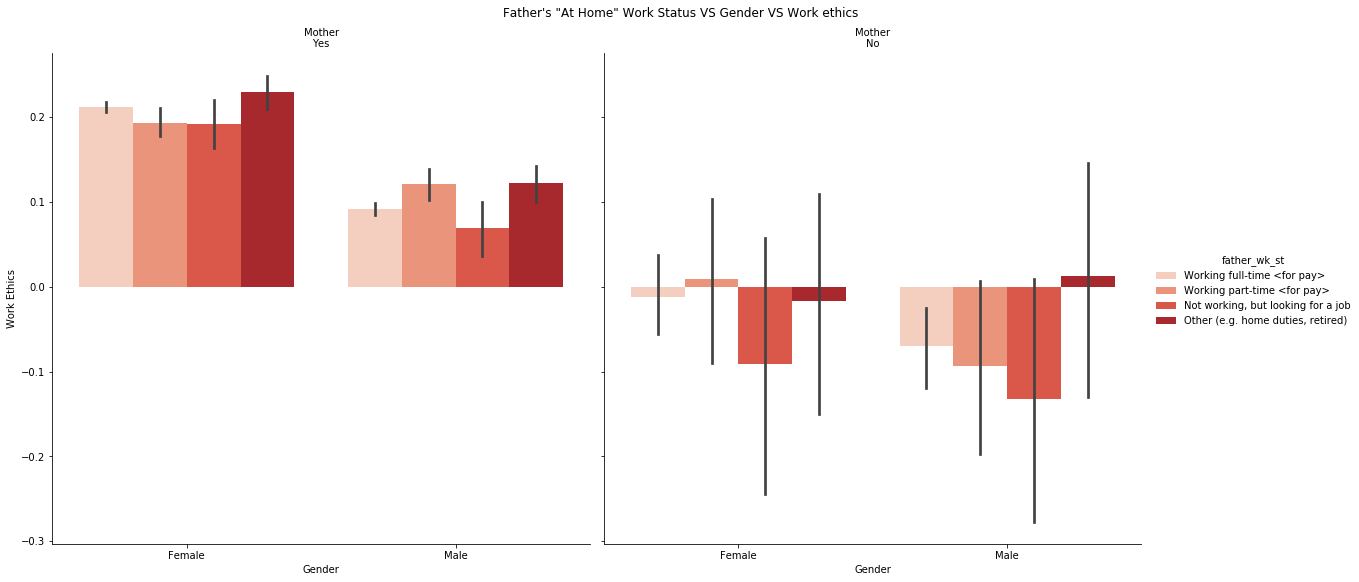

In [7]:
g = sb.catplot(data=df[df['father'] == 'Yes'], kind="bar",
               x="gender", y="math_wk_ethic", hue="father_wk_st", col="mother",
               palette="Reds", alpha=1, height=8)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Father\'s "At Home" Work Status VS Gender VS Work ethics')
g.set_axis_labels("Gender", "Work Ethics")
g.set_titles("Mother\n{col_name}");

## Teacher Support for our kids, what do they think?

Teacher support is a score students give to teachers through multiple questions that indicate how much the teacher was supporting them.

* student with no parents gives teacher more credits, Again A huge difference from kids with parents

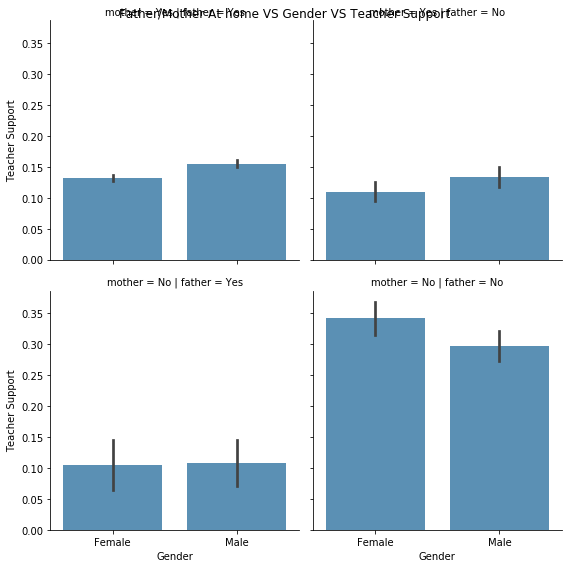

In [8]:
g = sb.catplot(data=df, kind="bar",
           x="gender", y="teacher_support", row="mother", col='father',
           color=color, alpha=.8, height=4)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Father/Mother At home VS Gender VS Teacher Support')
g.set_axis_labels("Gender", "Teacher Support")
g.tight_layout();

## What Does A kid says about his Teacher, Supporting him VS if he Fails The Exam

teachers fault is a score combine two answers for two questions, about if he fails on an exam too many times, does he think it is the teacher fault?
<br><br>
* And As u can see, if a student gives teachers credit for helping them, then when asked elsewhere if he thinks it's the teacher's fault for failing the exam he will say no.(look at the negative relation with dark colors)


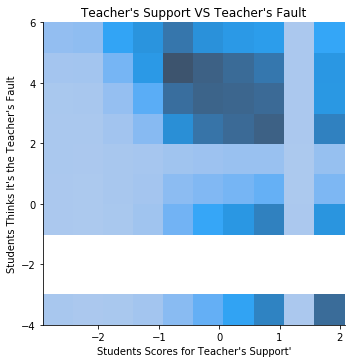

In [9]:
g= sb.displot(df, x='teacher_support', y='teachers_fault_thinking',
               binwidth=[0.5, 1])
plt.title('Teacher\'s Support VS Teacher\'s Fault')
g.set_axis_labels("Students Scores for Teacher\'s Support'", "Students Thinks It\'s the Teacher\'s Fault");

# Final Thoughts

* After investigating The relation between family and student's ethics, it left me with more questions than answers, losing both parents might be hard but students can adapt well and do much better.
* should this be scary?